<a href="https://colab.research.google.com/github/Vita1ik/Machine_Learning/blob/main/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 1.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

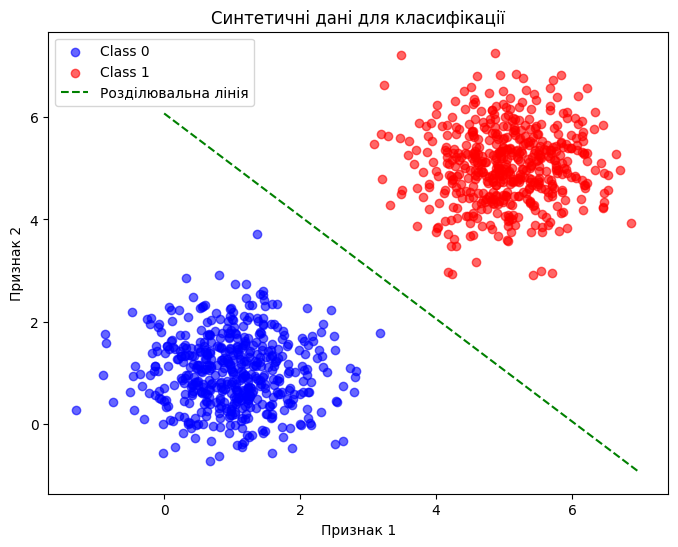

In [ ]:
# Встановлення випадкового насіння для відтворюваності
np.random.seed(42)

# Генерація даних для класу 0
num_samples_class_0 = 500
mean_0 = [1, 1]
cov_0 = [[0.5, 0], [0, 0.5]]  # Коваріаційна матриця
class_0 = np.random.multivariate_normal(mean_0, cov_0, num_samples_class_0)

# Генерація даних для класу 1
num_samples_class_1 = 500
mean_1 = [5, 5]
cov_1 = [[0.5, 0], [0, 0.5]]  # Коваріаційна матриця
class_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples_class_1)

# Об'єднання класів
X = np.vstack((class_0, class_1))
y = np.array([0] * num_samples_class_0 + [1] * num_samples_class_1)

# Запис у CSV файл
# Конвертування в DataFrame та додавання колонки "Class"
df_class_0 = pd.DataFrame(class_0, columns=["x", "y"])
df_class_0["Class"] = "Class 0"

df_class_1 = pd.DataFrame(class_1, columns=["x", "y"])
df_class_1["Class"] = "Class 1"

# Об'єднання двох DataFrame
df = pd.concat([df_class_0, df_class_1])

# Запис у CSV файл
df.to_csv("data.csv", index=False)

# Візуалізація даних
plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1', alpha=0.6)
plt.title('Синтетичні дані для класифікації')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')


# Побудова лінії, що розділяє класи
# Обчислення центрів кожного класу
center_0 = np.mean(class_0, axis=0)
center_1 = np.mean(class_1, axis=0)

# Обчислення середньої точки між центрами
midpoint = (center_0 + center_1) / 2

# Обчислення вектора напрямку
direction = center_1 - center_0
slope = -direction[0] / direction[1]  # Обчислення нахилу перпендикулярної лінії

# Створення точок для побудови розділювальної лінії
x_vals = np.array([0, 7])  # Задаємо область по x
y_vals = midpoint[1] + slope * (x_vals - midpoint[0])  # Обчислюємо y для відповідного x

# Додавання розділювальної лінії
plt.plot(x_vals, y_vals, 'g--', label='Розділювальна лінія')
plt.legend()
plt.show()

In [ ]:
#code

In [ ]:
#code

In [ ]:
#code

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

In [ ]:
# Встановлення випадкового насіння для відтворюваності
np.random.seed(42)

# Генерація даних для класу 0
num_samples_class_0 = 500
mean_0 = [4, 7]
cov_0 = [[0.5, 0], [0, 0.5]]  # Коваріаційна матриця
class_0 = np.random.multivariate_normal(mean_0, cov_0, num_samples_class_0)

# Генерація даних для класу 1
num_samples_class_1 = 500
mean_1 = [7, 7]
cov_1 = [[0.5, 0], [0, 0.5]]  # Коваріаційна матриця
class_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples_class_1)

# Генерація даних для класу 2
num_samples_class_2 = 500
mean_2 = [7, 4]
cov_2 = [[0.5, 0], [0, 0.5]]  # Коваріаційна матриця
class_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples_class_2)

# Об'єднання класів
X = np.vstack((class_0, class_1, class_2))
y = np.array([0] * num_samples_class_0 + [1] * num_samples_class_1 + [2] * num_samples_class_2)


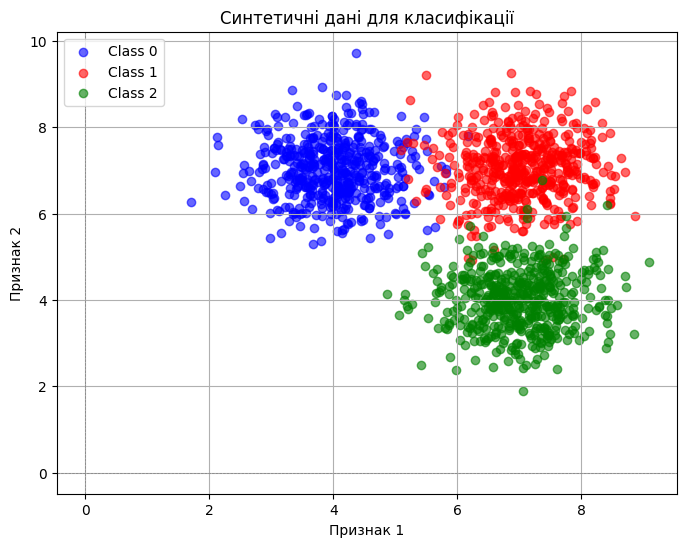

In [ ]:
# Візуалізація даних
plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1', alpha=0.6)
plt.scatter(class_2[:, 0], class_2[:, 1], color='green', label='Class 2', alpha=0.6)
plt.title('Синтетичні дані для класифікації')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.axhline(0, color='gray', lw=0.5, ls='--')
plt.axvline(0, color='gray', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Запис у CSV файл
# Конвертування в DataFrame та додавання колонки "Class"
df_points_0 = pd.DataFrame(class_0, columns=["x", "y"])
df_points_0["Class"] = "Class 0"

df_points_1 = pd.DataFrame(class_1, columns=["x", "y"])
df_points_1["Class"] = "Class 1"

df_points_2 = pd.DataFrame(class_2, columns=["x", "y"])
df_points_2["Class"] = "Class 2"


# Об'єднання двох DataFrame
df = pd.concat([df_points_0, df_points_1, df_points_2])

print(df)

# Запис у CSV файл
df.to_csv("data.csv", index=False)

            x         y    Class
0    4.351230  6.902232  Class 0
1    4.457985  8.076945  Class 0
2    3.834429  6.834440  Class 0
3    5.116672  7.542658  Class 0
4    3.668031  7.383648  Class 0
..        ...       ...      ...
495  8.072253  4.425762  Class 2
496  7.050938  3.849946  Class 2
497  6.326892  4.054787  Class 2
498  7.182259  3.121943  Class 2
499  7.236298  3.890215  Class 2

[1500 rows x 3 columns]


            x         y
0    4.351230  6.902232
1    4.457985  8.076945
2    3.834429  6.834440
3    5.116672  7.542658
4    3.668031  7.383648
..        ...       ...
495  4.147349  5.556275
496  3.825219  6.517764
497  3.291748  6.801232
498  5.271156  7.453144
499  3.596115  7.404877

[500 rows x 2 columns]


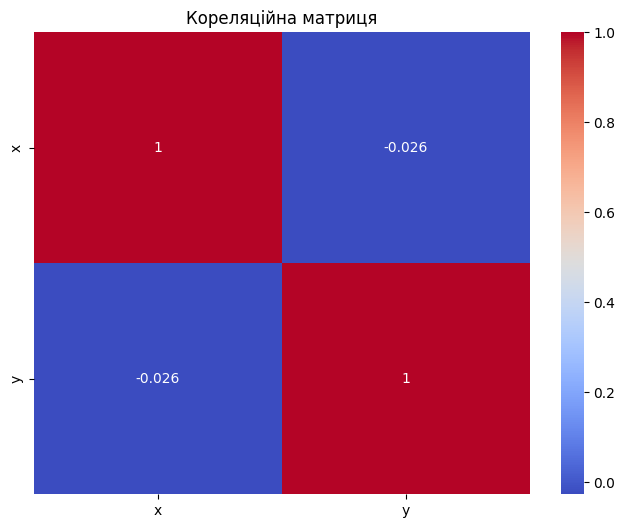

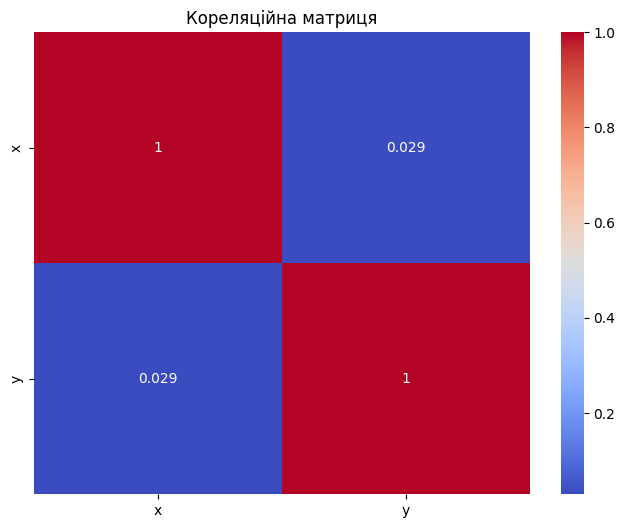

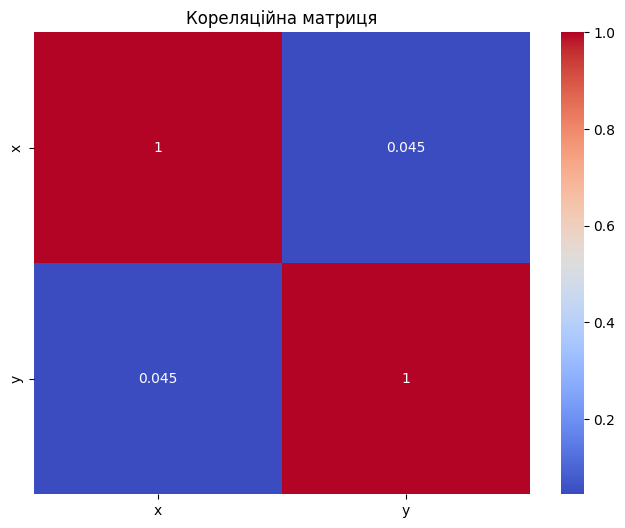

In [ ]:
import seaborn as sns


# Обчислення кореляційної матриці
correlation_matrix_class_0 = df_points_0[['x', 'y']].corr()
correlation_matrix_class_1 = df_points_1[['x', 'y']].corr()
correlation_matrix_class_2 = df_points_2[['x', 'y']].corr()

# # Відображення кореляційної матриці як теплової карти
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_class_0, annot=True, cmap="coolwarm")
plt.title("Кореляційна матриця для класу 1")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_class_1, annot=True, cmap="coolwarm")
plt.title("Кореляційна матриця для класу 2")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_class_2, annot=True, cmap="coolwarm")
plt.title("Кореляційна матриця для класу 3")
plt.show()

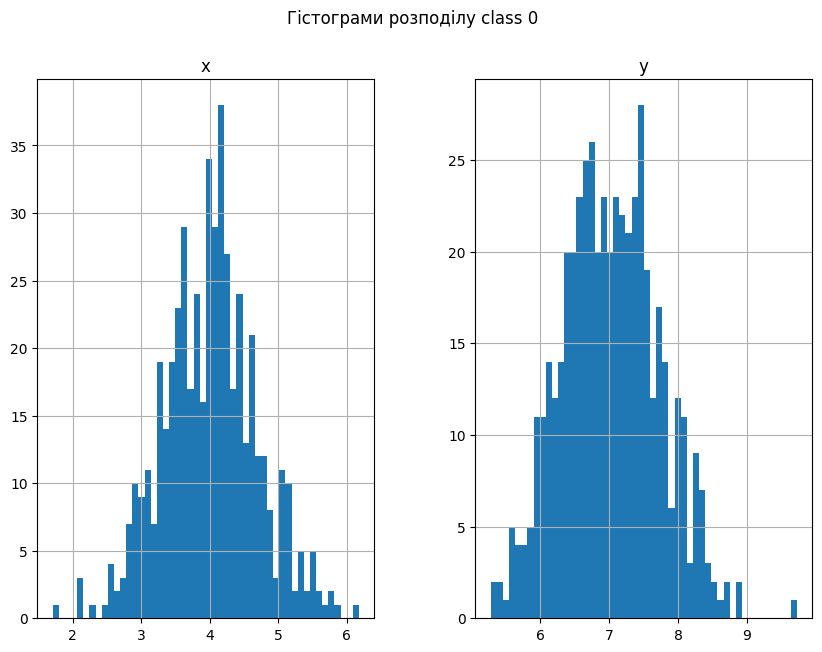

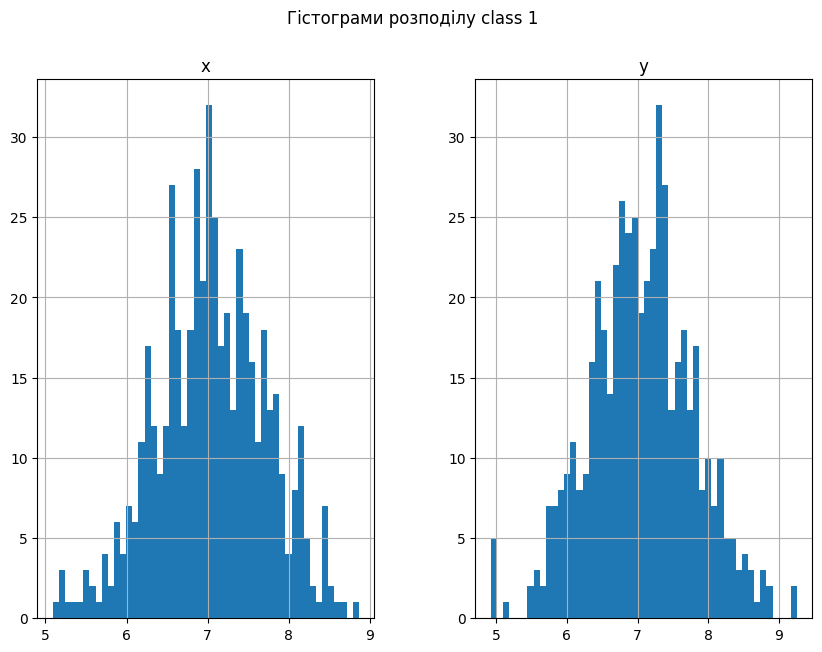

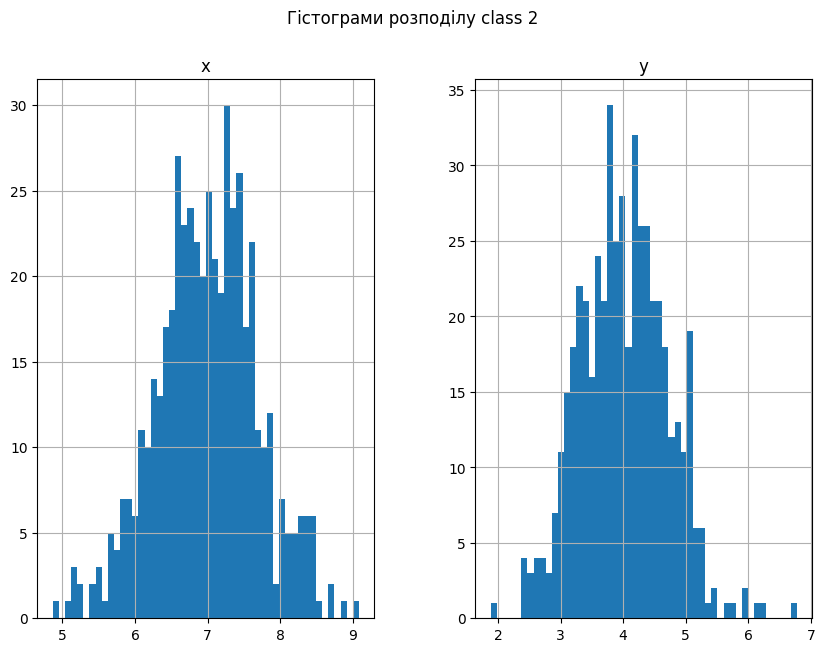

In [ ]:
# Відображення гістограм для кожної змінної

df_points_0.hist(bins=50, figsize=(10, 7), grid=True)
plt.suptitle("Гістограми розподілу class 0")

df_points_1.hist(bins=50, figsize=(10, 7), grid=True)
plt.suptitle("Гістограми розподілу class 1")

df_points_2.hist(bins=50, figsize=(10, 7), grid=True)
plt.suptitle("Гістограми розподілу class 2")
plt.show()


**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

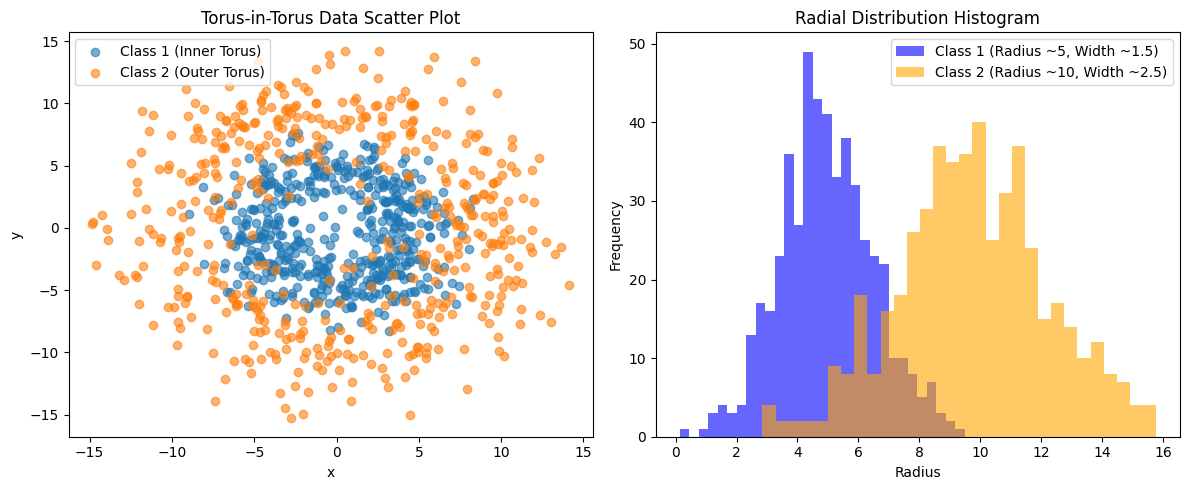

In [ ]:
n_points = 500
inner_radius = 5
outer_radius = 10
width_inner = 1.5
width_outer = 2.5

def generate_torus(radius, width, n, label):
    angles = np.random.uniform(0, 2 * np.pi, n)
    radii = np.random.normal(radius, width, n)
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    data = np.column_stack((x, y, np.full(n, label, dtype=int)))
    return data


inner_torus = generate_torus(inner_radius, width_inner, n_points, label=1)
outer_torus = generate_torus(outer_radius, width_outer, n_points, label=2)

data = np.vstack((inner_torus, outer_torus))
df = pd.DataFrame(data, columns=['x', 'y', 'class'])

df.to_csv('tor_in_tor_dataset.csv', index=False)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))


ax[0].scatter(df[df['class'] == 1]['x'], df[df['class'] == 1]['y'], label='Class 1 (Inner Torus)', alpha=0.6)
ax[0].scatter(df[df['class'] == 2]['x'], df[df['class'] == 2]['y'], label='Class 2 (Outer Torus)', alpha=0.6)
ax[0].set_title("Torus-in-Torus Data Scatter Plot")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].legend()


for class_label, radius, width, color in zip([1, 2], [inner_radius, outer_radius], [width_inner, width_outer], ['blue', 'orange']):
    radii = np.sqrt(df[df['class'] == class_label]['x']**2 + df[df['class'] == class_label]['y']**2)
    ax[1].hist(radii, bins=30, alpha=0.6, label=f'Class {class_label} (Radius ~{radius}, Width ~{width})', color=color)

ax[1].set_title("Radial Distribution Histogram")
ax[1].set_xlabel("Radius")
ax[1].set_ylabel("Frequency")
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
#code

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

In [ ]:
#code

In [ ]:
#code

In [ ]:
#code

In [ ]:
#code

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

In [ ]:
#code

In [ ]:
#code

In [ ]:
#code

In [ ]:
#code